<a href="https://colab.research.google.com/github/ydev365/linear-algebra/blob/main/linear_algebra_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

original data : (10, 3)
transform data : (10, 3)


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


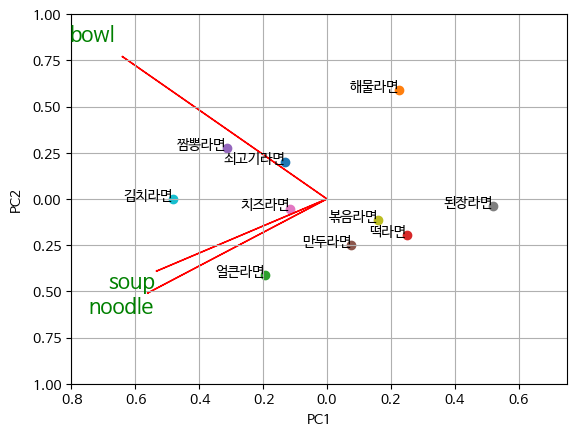

In [1]:

import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

lamen=dict({'name':['쇠고기라면','해물라면','얼큰라면','떡라면','짬뽕라면','만두라면','치즈라면','된장라면','볶음라면','김치라면'],'noodle':[2,1,5,2,3,4,4,1,3,5],'bowl':[4,5,3,2,5,3,4,2,3,5],'soup':[5,1,4,3,5,2,3,1,2,5]})

lamen

lamen1=pd.DataFrame(lamen)
lamen1

lamenEval=lamen1[['noodle','bowl','soup']]
lamenName=lamen1['name']

scaler=StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled=scaler.transform(lamenEval.values)

lamen_scaled.shape

from sklearn.decomposition import PCA

pca_lamen=PCA()
pca_lamen.fit(lamen_scaled)

X_pca_lamen=pca_lamen.transform(lamen_scaled)

print('original data : {}'.format(str(lamen_scaled.shape)))
print('transform data : {}'.format(str(X_pca_lamen.shape)))

pca_lamen.components_

pc1=0
pc2=0
pc3=0

for j in range(len(pca_lamen.components_)):
  pc1 +=pca_lamen.components_[0][j]*lamen_scaled[:,j]
  pc2 +=pca_lamen.components_[1][j]*lamen_scaled[:,j]
  pc3 +=pca_lamen.components_[2][j]*lamen_scaled[:,j]

pc1=pc1.reshape(10,1)
pc2=pc2.reshape(10,1)
pc3=pc3.reshape(10,1)

np.round(np.hstack((pc1,pc2,pc3)),3)==np.round(X_pca_lamen,3)

def biplot2(score, coeff, label, pcax, pcay, labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs=score[:,pca1]
  ys=score[:,pca2]
  n=score.shape[1]
  scalex=1.0/(xs.max()-xs.min())
  scaley=1.0/(ys.max()-ys.min())

  for i in range(len(xs)):
    plt.scatter(xs[i]*scalex,ys[i]*scaley)
    plt.annotate(label.iloc[i],xy=(xs[i]*scalex, ys[i]*scaley),ha='right')

  for i in range(n):
    plt.arrow(0,0,coeff[i,pca1],coeff[i,pca2],color='r',alpha=1)
    if labels is None:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,'Var'+str(i+1),color='g',ha='center',va='center')
    else:
      plt.text(coeff[i,pca1]*1.15,coeff[i,pca2]*1.15,labels[i],color='g',ha='center',va='center',size=15)

  plt.xlim(-0.8,0.75)
  plt.ylim(-1,1)
  plt.xlabel('PC{}'.format(pcax))
  plt.ylabel('PC{}'.format(pcay))
  plt.grid()

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font',family='NanumBarunGothic')
%matplotlib inline
biplot2(X_pca_lamen,pca_lamen.components_, lamenName,1,2,labels=lamenEval.columns)







In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False